In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
# Step 1: Basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


In [4]:
# Step 2: Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0].sort_values(ascending=False))

Missing values:
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64


In [5]:
# Step 3: Feature Engineering
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df["Income_Loan_Ratio"] = df["Total_Income"] / (df["LoanAmount"] + 1)

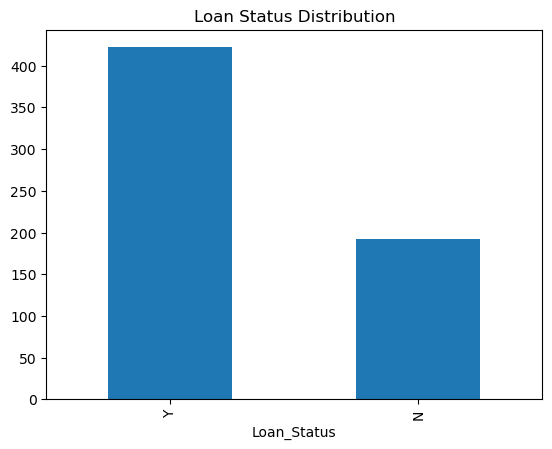

In [6]:
# Step 4: Loan status distribution
df["Loan_Status"].value_counts().plot(kind="bar", title="Loan Status Distribution")
plt.show()


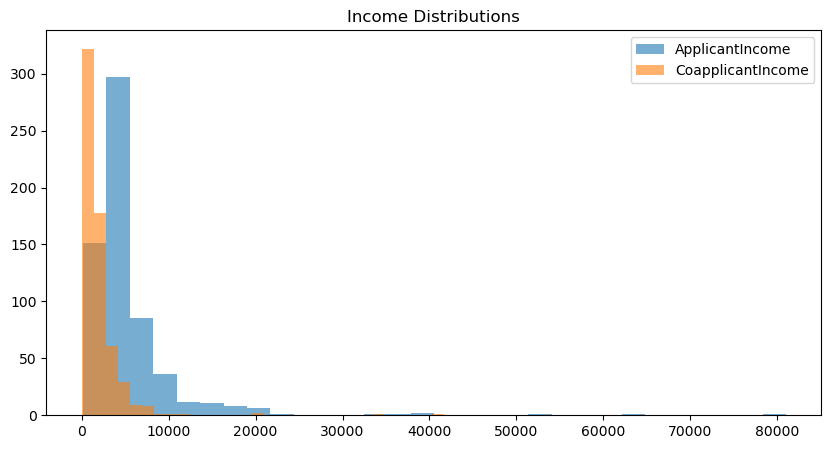

In [7]:
# Step 5: Income Distribution
plt.figure(figsize=(10,5))
plt.hist(df["ApplicantIncome"], bins=30, alpha=0.6, label="ApplicantIncome")
plt.hist(df["CoapplicantIncome"], bins=30, alpha=0.6, label="CoapplicantIncome")
plt.title("Income Distributions")
plt.legend()
plt.show()

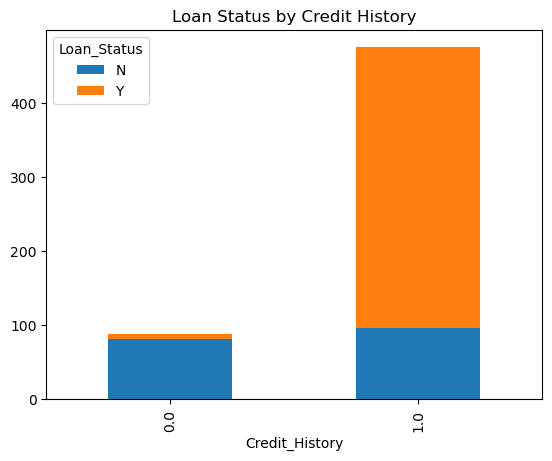

In [8]:
# Step 6: Credit history vs loan status
pd.crosstab(df["Credit_History"], df["Loan_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Status by Credit History")
plt.show()

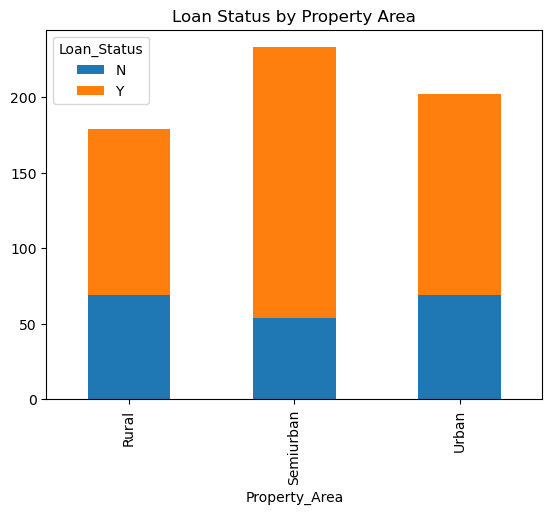

In [9]:
# Step 7: Property Area impact
pd.crosstab(df["Property_Area"], df["Loan_Status"]).plot(kind="bar", stacked=True)
plt.title("Loan Status by Property Area")
plt.show()

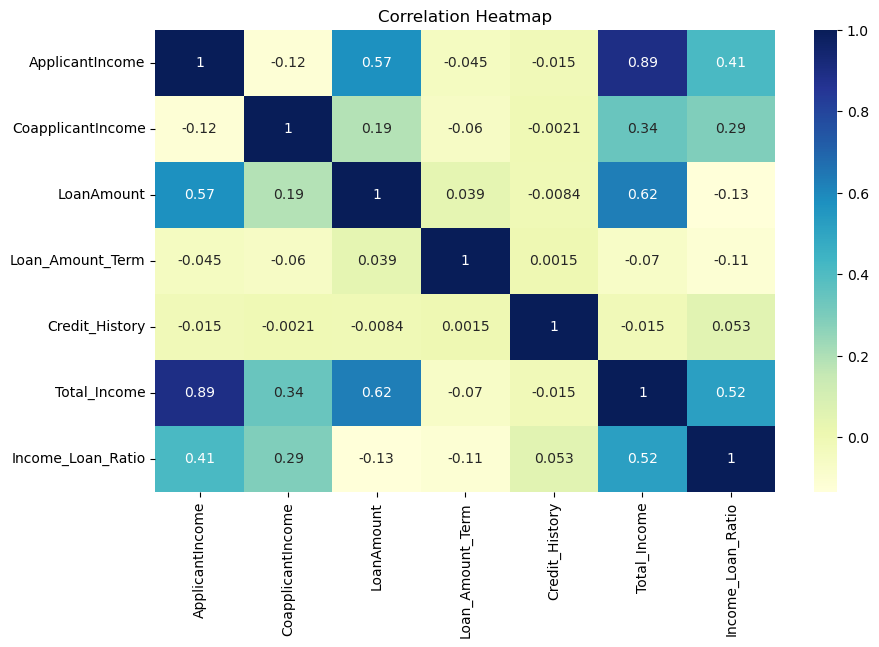

In [10]:
# Step 8: Correlation heatmap
plt.figure(figsize=(10, 6))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.title("Correlation Heatmap")
plt.show()

In [11]:
# Step 9: Summary
print(" Key Insights:")
print("- Credit history is the strongest predictor of loan approval.")
print("- Total income and income-loan ratio are useful features.")
print("- Urban and semiurban areas show higher loan approvals.")


 Key Insights:
- Credit history is the strongest predictor of loan approval.
- Total income and income-loan ratio are useful features.
- Urban and semiurban areas show higher loan approvals.
